## Summer 2020 CX4641/CS7641 Homework 2

## Instructor: Dr. Mahdi Roozbahani

## Deadline: June 22nd, Monday, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.


## Instructions for the assignment

- In this assignment, we have programming and writing questions.

- The Q4 is bonus for both undergraduate and graduate students.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You could directly type the Latex equations in the markdown cell.

- Typing with Latex\markdown is required for all the written questions. Handwritten answers would not be accepted. 
    
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.

## Using the autograder

- You will find two assignments on Gradescope that correspond to HW2: "HW2 - Programming" and "HW2 - Non-programming".

- You will submit your code for the autograder on "HW2 - Programming" in the following format:

    * kmeans.py
    * cleandata.py
    * gmm.py
    * semisupervised.py

- All you will have to do is to copy your implementations of the classes "Kmeans", "GMM", "CleanData", "SemiSupervised" onto the respective files. We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- **For the "HW2 - Non-programming" part, you will download your jupyter notbook as html and submit it on Gradescope. To download the notebook as html, click on "File" on the top left corner of this page and select "Download as > HTML". The non-programming part corresponds to Q2, Q3.3 (both your response and the generated images with your implementation) and Q4.2.**

## 0 Set up
This notebook is tested under [python 3.6.8](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)

Please implement the functions that have "raise NotImplementedError", and after you finish the coding, please delete or comment "raise NotImplementedError".

In [2]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

# Load image
import imageio

Version information
python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.1.3
numpy: 1.18.1


## 1. KMeans Clustering [5 + 30 + 10 + 5 pts]




KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K clusters: $S = \{S_1, S_2, \ldots, S_K\}$ and each cluster has $\mu_i$ as its center.


### 1.1 pairwise distance [5pts]

In this section, you are asked to implement pairwise_dist function.

Given $X \in \mathbb{R}^{N x D}$ and $Y \in \mathbb{R}^{M x D}$, obtain the pairwise distance matrix $dist \in \mathbb{R}^{N x M}$ using the euclidean distance metric, where $dist_{i, j} = ||X_i - Y_j||_2$.  

DO NOT USE FOR LOOP in your implementation -- they are slow and will make your code too slow to pass our grader.  Use array broadcasting instead.

### 1.2 KMeans Implementation [30pts]

In this section, you are asked to implement _init_centers [5pts], _update_assignment [10pts], _update_centers [10pts] and _get_loss function [5pts].

For the function signature, please see the corresponding doc strings.

### 1.3 Find the optimal number of clusters [10 pts]

In this section, you are asked to implement find_optimal_num_clusters function.

You will now use the elbow method to find the optimal number of clusters.

In [173]:
class KMeans(object):
    
    def __init__(self): #No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [5 pts]
        np.random.seed(1)
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
                """
        return np.sqrt(np.sum(np.square(y.T-x[:,:,None]), axis=1))

    def _init_centers(self, points, K, **kwargs): # [5 pts]
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        return points[np.random.choice(points.shape[0], K)]


    def _update_assignment(self, centers, points): # [10 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
        # NxK matrix of distances
        dist = self.pairwise_dist( points, centers)
        assert dist.shape ==(len(points), centers.shape[0])
        cluster_idx = np.argmin(dist, axis=1)
        assert len(cluster_idx) == len(points)
        return cluster_idx

    def _update_centers(self, old_centers, cluster_idx, points): # [10 pts]
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        centers = []
        for k in range(old_centers.shape[0]):
            p_cluster = points[np.argwhere(cluster_idx==k)][:,0,:]
            new_cluster = np.mean(p_cluster, axis=0) 
            assert new_cluster.shape[0] == old_centers.shape[1]
            centers.append(new_cluster)
        return np.asarray(centers).reshape(old_centers.shape)

    def _get_loss(self, centers, cluster_idx, points): # [5 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """
        loss=0
        for idx, c in enumerate(centers):
            p_cluster = points[np.argwhere(cluster_idx==idx)]
            tmp_loss = np.sum(np.square(self.pairwise_dist(p_cluster,c)),axis=1).sum()
            loss+=tmp_loss
        return loss
        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss
    
    def find_optimal_num_clusters(self, data, max_K=15): # [10 pts]
        np.random.seed(1)
        """Plots loss values for different number of clusters in K-Means
        
        Args:
            data: input data array
            max_K: number of clusters
        Return:
            losses: a list, which includes the loss values for different number of clusters in K-Means
            Plot loss values against number of clusters
        """
        losses = []
        for k in range(1, max_K):
            cluster_idxk, centersk, lossk = self.__call__(data, k)
            losses.append(lossk)
        plt.plot(losses)
        return losses


### 1.4 COVID19 Clustering [5 pts]

In this section, we are going to use our Kmeans algorithm to cluster the COVID19 dataset. The size for the dataset is $187\times 3$, which includes all the number of confirmed cases and deathtoll for COVID19 till May 20th, 2020. 
The three columns are:
* Countries
* The number of confirmed cases
* Death toll

We are going to do the clustering task for just two columns which are the number of confirmed cases and death toll. The reason we have countries in our dataset is for you to associate the names of countries to each cluster.

In [108]:
# Helper function for checking the implementation of pairwise_distance fucntion. Please DO NOT change this function
# TEST CASE
x = np.random.randn(2, 2)
y = np.random.randn(3, 2)

print("*** Expected Answer ***")
print("""==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]""")


print("\n*** My Answer ***")
print("==x==")
print(x)
print("==y==")
print(y)
print("==dist==")
print(KMeans().pairwise_dist(x, y))

*** Expected Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]

*** My Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]


In [109]:
#Helper function for reading the .csv file.You don't need to change this function   
def read_file():
    data = np.zeros((187,2))
    countries = []
    cnt=0
    with open(r'covid19_confirmed_deaths_052020.csv', 'r') as f:
        for line in f:
            country, confirmed,death = line.split(',')
            data[cnt,:]=[confirmed,death]
            countries.append(country)
            cnt+=1
    return data, countries

In [145]:
# Helper function for visualizing cluster results. You don't have to modify it
# If there are more than ten countries in the cluster, we are only going to show the first 10 countries as examples.
def visualize (cluster_idx,centers, K,name_list):
   
    num_list = [np.sum(np.array(cluster_idx) == i) for i in range(0,K) ]

    x =list(range(len(num_list)))
    total_width, n = 0.8, 2
    width = total_width / n
    plt.figure(figsize=(10,5))
    plt.title('Visualization for '+ str(K) + ' clusters', fontdict = {'fontsize' : 18})
    plt.bar(x, num_list, width=width, label='number',tick_label = name_list, fc = 'orchid')

    plt.legend()
    for i in range(0, K):     
        print('{0}: Average confirmed: {1:.2f}, Average Deathtoll: {2:.2f}.'.format(name_list[i], centers[i][0], centers[i][1])) 
        data = list(np.array(countries)[np.where(cluster_idx==i)])
        print('Total number of countries in {0}: {1}'.format(name_list[i], len(data)))
        if len(data) > 10:
            data = data[:10]
        print(('{}   '*len(data)).format(*data))
        print('\n')
    
    plt.show()

dist before argmin [[5.91611021e+03 5.41753311e+03]
 [1.26700158e+03 1.76581313e+03]
 [5.33828081e+03 4.83564318e+03]
 [1.46916473e+03 1.96691535e+03]
 [2.17915511e+03 2.67817849e+03]
 [2.20615321e+03 2.70515674e+03]
 [7.06191051e+03 6.56150051e+03]
 [3.04023749e+03 2.54338062e+03]
 [4.85051966e+03 4.35301390e+03]
 [1.41349107e+04 1.36349957e+04]
 [1.40007000e+03 9.05556735e+02]
 [2.13407591e+03 2.63289973e+03]
 [5.65702554e+03 5.16094962e+03]
 [2.45096001e+04 2.40115748e+04]
 [2.14111303e+03 2.64004924e+03]
 [3.01953726e+04 2.96980779e+04]
 [5.45203645e+04 5.40166506e+04]
 [2.10117348e+03 2.60028556e+03]
 [2.21019026e+03 2.70927481e+03]
 [2.69337038e+03 2.19276652e+03]
 [1.51320851e+02 3.90800461e+02]
 [2.89960056e+05 2.89458784e+05]
 [2.09018755e+03 2.58933756e+03]
 [1.06254412e+02 4.36028669e+02]
 [1.42218599e+03 1.91990677e+03]
 [1.88217959e+03 2.38145019e+03]
 [2.10919937e+03 2.60836290e+03]
 [1.50655003e+03 1.00560927e+03]
 [7.95627258e+04 7.90609028e+04]
 [1.81323192e+03 2.31266

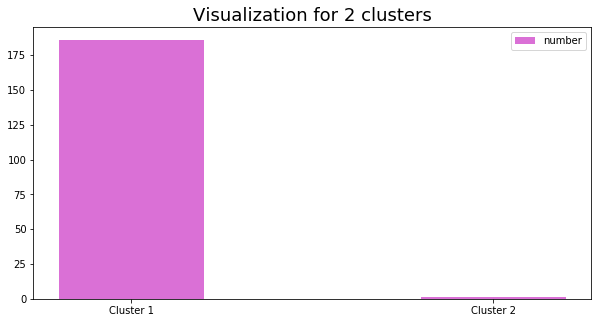

dist before argmin [[5.91611021e+03 5.41753311e+03 1.10942760e+04 9.85917177e+03
  2.12196415e+04]
 [1.26700158e+03 1.76581313e+03 1.82651895e+04 1.70417835e+04
  2.84000014e+04]
 [5.33828081e+03 4.83564318e+03 1.16664855e+04 1.04635062e+04
  2.18288296e+04]
 [1.46916473e+03 1.96691535e+03 1.84654491e+04 1.72434053e+04
  2.86020147e+04]
 [2.17915511e+03 2.67817849e+03 1.91770668e+04 1.79541443e+04
  2.93120062e+04]
 [2.20615321e+03 2.70515674e+03 1.92040104e+04 1.79811396e+04
  2.93390062e+04]
 [7.06191051e+03 6.56150051e+03 9.94146654e+03 8.72023486e+03
  2.00846141e+04]
 [3.04023749e+03 2.54338062e+03 1.39675105e+04 1.27349051e+04
  2.40930420e+04]
 [4.85051966e+03 4.35301390e+03 1.21617362e+04 1.09246146e+04
  2.22831365e+04]
 [1.41349107e+04 1.36349957e+04 2.90065113e+03 1.67598807e+03
  1.30253385e+04]
 [1.40007000e+03 9.05556735e+02 1.56041329e+04 1.43750478e+04
  2.57330086e+04]
 [2.13407591e+03 2.63289973e+03 1.91316446e+04 1.79090039e+04
  2.92670021e+04]
 [5.65702554e+03 5.16

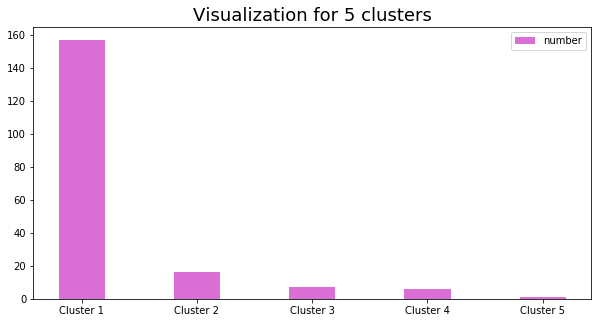

In [166]:
# Helper function for running the algorithm for K=2 and K=5. You don't have to modify it
name_list0 = ['Cluster 1','Cluster 2']
name_list1 = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']

data, countries = read_file()
cluster_idx2, centers2, loss2 = KMeans()(data, 2,verbose=True)
visualize(cluster_idx2, centers2, 2, name_list0)

cluster_idx5, centers5, loss5 = KMeans()(data, 5, verbose=True)
visualize(cluster_idx5, centers5, 5, name_list1)

[2807829821020.61,
 460767789772.72046,
 87862229057.5969,
 41815322446.129425,
 25909441342.44567,
 22273270978.877346,
 14721982198.412195,
 13070933147.453753,
 12974926155.699322,
 12953425608.954332,
 12943241394.10258,
 12941971965.345829,
 12935222610.3698,
 12934739841.45864]

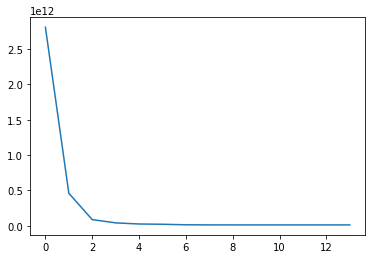

In [174]:
# Helper function for visualizing elbow method result. You don't have to modify it

KMeans().find_optimal_num_clusters(data)

## 2 EM algorithm [20 pts]

### 2.1 Performing EM Algorithm [20 pts for CS 4641; 10 points for CS 7641]

EM algorithm is a widely used approach to learning in the presence of unobserved variables. Consider the general framework of the EM algorithm, given a joint distribution $P(x,z|\theta)$ over observed variables $x$, hidden variable $z$ and its distribution $q(z)$, and governing parameter $\theta$, the goal is to maximize the likelihbood function $P(x|\theta)$ and given the following expression:
    
$$\log P(x|\theta) = \log (\sum_{z}P(x, z|\theta)) = \log (\sum_{z}q(z)\frac{P(x, z|\theta)}{q(z)}) \geq \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)} = \sum_{z}q(z) \log \frac{P(z|x, \theta)P(x|\theta)}{q(z)}$$

The inequality is based on the Jensen's Theorem.

2.1.1. Please provide a brief description on how to perform the $E$ step in the above equation.

2.1.2. Please provide a brief description on how to perform the $M$ step in the above equation.

Suppose

$$F(q,\theta) = \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$$

During the lecture, the expression $\sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$ was explained through the sum of entropy and log-likelihood; the same approach can also be explained using KL-divergence. 

2.1.3. Please derive that from the above equation (**Hint**: use product rule for joint probability) and explain what will happen to the KL term in the $E$ step.

#### 2.1 Answers: 
2.1.1 In the E part we evaluate the latent distribution or unknown data that we have artificially introduced, given $x$ (known data) and a previously obtained $\theta$. i.e we compute $$P(Z|X,\theta_{prev})$$ randomly sampling from the distribution chosen for the given application and its parameters obtained from the previous M step or from initialization (for instance with k-means if we are using a GMM). In particular this work because $q(z)$ is a constant in this framework.

2.1.2 In the M part we re-estimate the value of the parameters $\theta$ using Maximum Likelihood Estimation because we are in presence of a probabilistic model.

2.1.3 \begin{align}F(q,\theta) &= \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}\\
&= \sum_{z}q(z) \log \frac{P(z|x,\theta)P(x|\theta) }{q(z)} \\
&= \sum_{z}q(z) \log \frac{P(z|x,\theta)}{q(z)} + q(z)P(x|\theta) \\ 
&= KL[Q(Z)\|P(Z)]+ \sum_{z}q(z)\log P(x|\theta)
\end{align}
Since $q(z)P(x|\theta)$ is constant with respect to $\theta$, MLE will maximize the KL term only.

### 2.2 EM Algorithm in Coin Toss problem [10 pts for CS 7641; 10 points Bonus for CS 4641]

Suppose we have a bunch of coins $C$ consisting three kinds of coins. Mathematically, it obeys a mixed Bernoulli distribution:
$$X\sim F = \pi_{1} F_{1}+\pi_{2} F_{2}+(1-\pi_{1}-\pi_{2}) F_{3}$$
where $\pi \in [0,1]$, and $F_{1}=Ber(p_{1})$, $F_{2}=Ber(p_{2})$, $F_{3}=Ber(p_{3})$. That is to say, each coin belongs to $F_{1}$, $F_{2}$ or $F_{3}$. Here $Ber(p)$ means the coin gives 1 (head) with probability $p$ and gives 0 (tail) with probability $1-p$.
We initialized parameters $p_{1}=\frac{1}{2}$, $p_{2}=\frac{5}{6}$, $p_{3}=\frac{1}{3}$, $\pi_{1}=\frac{1}{4}$, $\pi_{2}=\frac{1}{2}$. Now, we draw 3 coins $X_{1}$, $X_{2}$, $X_{3}$ independently from $C$ and have 6 independent trials for each of them. The result shows:

$$
\begin{array}{|c|c|c|c|}\hline Coins & X_{1} & X_{2} & X_{3}   \\ \hline Trial 1 & 0 & 1 & 1   \\ \hline Trial 2 & 0 & 1 & 1   \\ \hline Trial 3 & 1 & 0 & 1   \\  \hline Trial 4 & 0 & 1 & 1   \\ \hline Trial 5 & 1 & 0 & 1   \\ \hline Trial 6 & 1 & 0 & 0   \\\hline\end{array}
$$


2.2.1. Use EM algorithm for one step, we update $F = F(p_{1}=\frac{1}{2}$, $p_{2}=\frac{5}{6}$, $p_{3}=\frac{1}{3}$, $\pi_{1}=\frac{1}{4}$, $\pi_{2}=\frac{1}{2})$ to $F^{'}(p_{1}^{'},p_{2}^{'},p_{3}^{'},\pi_{1}^{'},\pi_{2}^{'})$. Write down your EM algorithm and show the value of $p_{1}^{'},p_{2}^{'},p_{3}^{'},\pi_{1}^{'},\pi_{2}^{'}$. (Round the answer to three decimal places.)

(**Hint**: $\theta^{new}=argmax_{\theta}\sum_{Z}p(Z|X,\theta^{old})\ln p(X,Z|\theta)$)

2.2.2. Can you explain the reason why we are getting the value of $p_{1}^{'},p_{2}^{'},p_{3}^{'},\pi_{1}^{'},\pi_{2}^{'}$ in 2.2.1? What will the values be if we implement more EM steps? 

(**Hint**: For example, why the values are increasing/ decreasing? Will the values be stable if we implement more steps? No need to calculate the real number)

#### 2.2 Answers
During the ***E step*** we compute: 


$$\forall i \in \mathbb{N},\ p(Z=i|X_j,\theta^{old})=\tau_{i,j} = \frac{P(Z_i) P(X_j|Z_i)}{\sum_{k=1}^{3} P(Z_k)P(X_j|Z_k)} = \frac{\pi_i\prod_{l=1}^6 p_i^{x_l}(1-p_i)^{1-x_l}}{\sum_{k=1}^{3} \pi_k \prod_{l=1}^6 p_k^{x_l}(1-p_k)^{1-x_l}}$$

Moreover, we observe that $p(Z|X_1) = p(Z|X_2)$ because $Z \sim Ber(p)$ and $X_1$ and $X_2$ shows 2 different combinations of the same result.

$$
\begin{array}{|c|c|c|c|}\hline \tau_{i,j} & j= 1 & j=2 & j=3   \\ \hline i=1 & 0.489 & 0.489 & 0.103 \\ \hline i=2 & 0.168 & 0.168 & 0.879  \\ \hline i = 3 & 0.343 & 0.343 & 0.018   \\  \hline\end{array}
$$

During the ***M step*** we optimize the following
\begin{align}\theta^{new}&=argmax_{\theta}\sum_{Z}p(Z|X,\theta^{old})\log p(X,Z|\theta)\\
&=argmax_{\theta} \sum_i^N \sum_k^K p(Z_k|X_i,\theta_{old}) \log p(X_i,Z_k| \theta)\\
&=argmax_{\theta} \sum_i^N \sum_k^K \tau_{k,i} [ \log p(X_i| Z_k,\theta) + \log p(Z_k|\theta)] \\
&=argmax_{\theta} \sum_i^N \sum_k^K \tau_{k,i} [ \log \pi_k + \log \prod_{j=1}^D p_{k}^{x_{ij}}(1-p_{k})^{1-x_{ij}}] \\
&=argmax_{\theta} \sum_i^3 \sum_k^3 \tau_{k,i} [ \log \pi_k + \sum_{j=1}^6 x_{ij} \log p_{k} + (1-x_{ij}) \log (1-p_{k})] \\
\end{align}

In order to find $p_{k}$ we use the derivative over $p_{k}$:
\begin{align}
\sum_{n=1}^N \tau_{k,n} \sum_{j=1}^6(\frac{x_{nj}}{p_{k}}-\frac{1-x_{nj}}{1-p_{k}}) &= 0\\
\iff p_{k}=\frac{\sum_{n=1}^N \tau_{k,n}}{6 \sum_{n=1}^N \tau_{k,n}} \sum_{j=1}^6 \ x_{nj}
\end{align}

Moreover we use lagrangian multiplier to find an expression of $\pi_{k}$:

we know $$L(X;\lambda) = \sum_i^N \sum_k^K \tau_{k,i} [ \log \pi_k + \sum_{j=1}^D x_{ij} \log p_k + (1-x_{ij}) \log (1-p_k)] - \lambda (\sum_k \pi_k - 1)$$

$$\frac{\partial}{\partial \pi_k} L(X;\lambda) = \sum_i^N  \frac{\tau_{n,k}}{\pi_k}-\lambda = 0 \iff \pi_k = \sum_i^N \frac{\tau_{n,k}}{\lambda}$$

Moreover, $$\sum_k \pi_k = 1\ i.e.  \ \sum_k  \sum_i^N \tau_{n,k} = \lambda  \Rightarrow \pi_k =  \frac{\sum_i^N\tau_{n,k}}{\sum_k \sum_i^N \tau_{n,k}}$$

Values for $\pi_k$ and $p_k$ are found in the prompt of the following cell

In [52]:
resp = np.array([[0.489, 0.168, 0.343],[0.489, 0.168, 0.343],[0.103, 0.879, 0.018]])
X = np.array([[0,1,1],[0,1,1],[1,0,1],[0,1,1],[1,0,1],[1,0,0]]).reshape((3,6))
X = X.sum(axis=1)
nk = resp.sum(axis=0)
pk =[]
for j in range(3):
    pk_cur = 0
    for i in range(3):
        pk_cur+=X[i]*resp[j,i]
    pk.append(round(pk_cur/(6*nk[j]),3))
print("pk={}".format(pk))
pi_k = np.round(resp.sum(axis=0)/resp.sum(axis=0).sum(),3)
print("pi_k={}".format(pi_k))

pk=[0.564, 0.502, 0.943]
pi_k=[0.36  0.405 0.235]


## 3. GMM implementation [40+10 pts]

GMM uses MLE to optimize its parameters. It approximates the distribution of data using a set of gaussian distributions. 

Given $N$ samples $X = [x_1, x_2, \ldots, x_N]$, we are asked to find $K$ diagonal gaussian distributions to model the data $X$: 

\begin{align}
    \max_{\{\mu_k, \sigma_k\}_{k=1}^K} \sum_{i=1}^N \log \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \sigma_k)\big)
\end{align}

- For undergaduate student: you may assume the covariance matrix is diag matrix, which means the features are independent. (i.e. the red intensity of a pixel is independent from its blue intensity, etc). 
- For graduate student: please assume full covariance matrix.

**Hints**

1. Here $\pi(\cdot)$ is the prior of the latent variable. It is also called the mixture coefficient. To make it simple, we assume $\pi(k) = \frac{1}{K}, \forall k = 1, 2, \ldots, K$.

2. As we create our model, we will need to use a multivariate Gaussian since our pixels are 3-dimensional vectors corresponding to red, green, and blue color intensities.  It means that for each image, you need to convert it into a N*3 matrix, where N is the number of pixels, and 3 is the number of features.

The following example from a machine learning textbook may be helpful:

3. In this question, each pixel has three features, which are R, G, and B.

4. At EM steps, gamma means $\tau\left(z_{k}\right)$ at our slide of GMM, which is called the responsibility. If we have K components, each data point (pixel) will have K responsibility values. $\tau\left(z_{k}\right)$ matrix size is $n\times 1$. For this homework, you will work with $\tau\left(z\right)$ which has a size of $n\times k$ which means that you have all the responsibility values in one matrix.

5. For E steps, we already get the log-likelihood at ll_joint() function. For the fomula at our slide: 
$$
\tau\left(z_{k}\right)=\frac{\pi_{k} N\left(x | \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} N\left(x | \mu_{j}, \Sigma_{j}\right)},
$$
    
ll_joint equals to the $N$ here. Thus, You should be able to finish E steps with just a few lines of code by using ll_joint() and softmax() defined above. 

## 3.1 Helper functions

To facilitate some of the operations in the GMM implementation, we would like you to implement the following two helper functions. In these functions, "logit" refers to an input array of size $N x D$.

### softmax

Given $logit \in \mathbb{R}^{N x D}$, calculate $prob \in \mathbb{R}^{N x D}$, where $prob_{i, j} = \frac{\exp(logit_{i, j})}{\sum_{d=1}^D exp(logit_{i, k})}$.

Note that it is possible that $logit_{i, j}$ is very large, making $\exp(\cdot)$ of it to explode. To make sure it is numerical stable, you may need to subtract the maximum for each row of $logits$.  As in calculating pairwise distances, DO NOT USE A FOR LOOP.

### logsumexp

Given $logit \in \mathbb{R}^{N x D}$, calculate $s \in \mathbb{R}^N$, where $s_i = \log \big( \sum_{j=1}^D \exp(logit_{i, j}) \big)$. Again, pay attention to the numerical problem. You may want to use similar trick as in the softmax function.  DO NOT USE A FOR LOOP.

## 3.2 GMM Implementations [40pts]



In [60]:
class GMM(object):
    def __init__(self): # No need to implement
        pass
    
    def softmax(self,logits): # [5pts]
        """
        Args:
            logits: N x D numpy array
        Return:
            logits: N x D numpy array
        """
        logits = logits.astype(dtype=np.float128)
        denom = np.sum(np.exp(logits),axis=1, dtype=np.float128)
        print(denom)
        return np.exp(logits)/denom
        
    def logsumexp(self,logits): # [5pts]
        """
        Args:
            logits: N x D numpy array
        Return:
            s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
        """
        return np.log(np.exp(logits).sum(axis=1))

    def _init_components(self, points, K, **kwargs): # [5pts]
        """
        Args:
            points: NxD numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        """
        raise NotImplementedError


    def _ll_joint(self, points, pi, mu, sigma, **kwargs): # [10pts]
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint for undergraduate: Assume that each dimension of our multivariate gaussian are independent.  
              This allows you to write treat it as a product of univariate gaussians.
        """
        raise NotImplementedError

    def _E_step(self, points, pi, mu, sigma, **kwargs): # [5pts]
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        raise NotImplementedError
        
    def _M_step(self, points, gamma, **kwargs): # [10pts]
        """
        Args:
            points: NxD numpy array, the observations
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Hint:  There are formulas in the slide.
        """
        raise NotImplementedError

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma(tau): NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxDxD numpy array)       
        Hint: You do not need to change it. For each iteration, we process E and M steps, then 
        """
        pi, mu, sigma = self._init_components(points, K, **kwargs)
        pbar = tqdm(range(max_iters))
        for it in pbar:
            # E-step
            gamma = self._E_step(points, pi, mu, sigma)
            
            # M-step
            pi, mu, sigma = self._M_step(points, gamma)
            
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(points, pi, mu, sigma)
            loss = -np.sum(self.logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            pbar.set_description('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)

## 3.3 Japanese art and pixel clustering [10pts]

Ukiyo-e is a Japanese art genre predominant from the 17th through 19th centuries. In order to produce the intricate prints that came to represent the genre, artists carved wood blocks with the patterns for each color in a design. Paint would be applied to the block and later transfered to the print to form the image.
In this section, you will use your GMM algorithm implementation to do pixel clustering and estimate how many wood blocks were likely used to produce a single print. (Hint: you can justify your answer based on visual inspection of the resulting images or on a different metric of your choosing)
#### You do NOT need to submit your code for this question to the autograder. Instead you should include whatever images/information you find relevant in the report.

In [11]:
# helper function for performing pixel clustering. You don't have to modify it
def cluster_pixels_gmm(image, K):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    gamma, (pi, mu, sigma) = GMM()(flat_img, K=K, max_iters=100)
    cluster_ids = np.argmax(gamma, axis=1)
    centers = mu

    gmm_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    
    return gmm_img

# helper function for plotting images. You don't have to modify it
def plot_images(img_list, title_list, figsize=(20, 10)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')

In [57]:
# pick 2 of the images in this list:
url0 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Kuniyoshi_Utagawa%2C_Suikoden_Series_4.jpg/320px-Kuniyoshi_Utagawa%2C_Suikoden_Series_4.jpg'
url1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Shibai_Ukie_by_Masanobu_Okumura.jpg/640px-Shibai_Ukie_by_Masanobu_Okumura.jpg'
url2 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flickr_-_%E2%80%A6trialsanderrors_-_Utamaro%2C_Kushi_%28Comb%29%2C_ca._1785.jpg/388px-Flickr_-_%E2%80%A6trialsanderrors_-_Utamaro%2C_Kushi_%28Comb%29%2C_ca._1785.jpg'
url3 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Geisha_Playing_the_Hand-Game_Kitsune-ken_%28%E7%8B%90%E6%8B%B3%29%2C_a_Japanese_rock-paper-scissors_variant%2C_by_Kikukawa_Eizan_%28%E8%8F%8A%E5%B7%9D%E8%8B%B1%E5%B1%B1%29.jpg/640px-Geisha_Playing_the_Hand-Game_Kitsune-ken_%28%E7%8B%90%E6%8B%B3%29%2C_a_Japanese_rock-paper-scissors_variant%2C_by_Kikukawa_Eizan_%28%E8%8F%8A%E5%B7%9D%E8%8B%B1%E5%B1%B1%29.jpg'

# example of loading image from url0
image = imageio.imread(imageio.core.urlopen(url0).read())

# this is for you to implement
def find_n_woodblocks(image, min_clusters=5, max_clusters=15):
    """Uses the 
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
    Return:
        plot: comparison between original image and image pixel clustering (you can use the helper function)
        optional: any other information/metric/plot you think is necessary.
    """
    raise NotImplementedError

## 4 (Bonus for All) Messy, messy data and semi-supervised learning [30 pts]
(Preamble: This part of the assignment was designed to expose you to interesting topics we did not cover in class, while allowing you to do minimal work by reusing most of your previous implementations with some modifications.)

Two students at Georgia Tech want to improve the safety of composite Lithium-ion batteries by leveraging data obtained from quality control tests and machine learning. They ordered several battery specimens $-$ rated as safe or unsafe $-$ from various manufacturers. They proceeded to measure the chemical stability, mechanical resistance and charging rate of each specimen.

When the campus shutdown was announced in the Spring 2020, the students rushed to the lab to try and collect the hard disks where the data had been stored. After settling back in their hometowns, they compiled the dataset and formatted it such that each row corresponds to the characterization results of a specimen, organized as follows:

Chemical stability, mechanical resistance, charging rate, [safe/unsafe]

They soon realized they have two major problems:
* They only have the safe/unsafe labels for characterization tests performed on batteries from one manufacturer (20% of the data), while the labels are missing for all specimens by other manufacturers.
* Due to a number of corrupt files, several of the labeled tests (30%) are missing some characterization data, which they labeled as NaN on their dataset.

The students are aware that the few data points with complete information do not reflect the overall variance of the data. They realize they cannot exclude neither the remaining unlabeled data nor the messy labeled data.

Your job is to assist the students in cleaning their data and implementing a semi-supervised learning framework to help them create a general classifier.

To help you with this task the students shared four datasets:
* Labeled_materials_complete.txt: containing the complete material characterization data and corresponding labels (safe = 1 and unsafe = 0);
* Labeled_materials_incomplete.txt: containing partial material characterization data and corresponding labels (safe = 1 and unsafe = 0);
* Unlabeled_materials.txt: containing only complete material characterization results;
* Independent_materials.txt: a labeled dataset the students obtained from a previous student in the laboratory, which you can use to test your model after training.

### 4.1 Data cleaning with k-NN [10pts]
The first step in this task is to clean the Labeled_materials_incomplete dataset by filling in the missing values with probable ones derived from complete data. A useful approach to this type of problem is using a k-nearest neighbors (k-NN) algorithm. For this application, the method consists of replacing the missing value of a given point with the mean of the closest k-neighbors to that point.

In [54]:
class CleanData(object):
    def __init__(self): # No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [0pts] - copy from kmeans
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
            dist: N x M array, where dist2[i, j] is the euclidean distance between 
            x[i, :] and y[j, :]
        """
        raise NotImplementedError
    
    def __call__(self, incomplete_points,  complete_points, K, **kwargs): # [10pts]
        """
        Args:
            incomplete_points: N_incomplete x (D+1) numpy array, the incomplete labeled observations
            complete_points: N_complete x (D+1) numpy array, the complete labeled observations
            K: integer, corresponding to the number of nearest neighbors you want to base your calculation on
            kwargs: any other args you want
        Return:
            clean_points: (N_incomplete + N_complete) x (D-1) X D numpy array of length K, containing both complete points and recently filled points
            
        Hints: (1) You want to find the k-nearest neighbors within each class separately;
               (2) There are missing values in all of the features. It might be more convenient to address each feature at a time.
        """
        raise NotImplementedError

In [68]:
complete_data = np.array([[1.,2.,3.,1],[7.,8.,9.,0],[16.,17.,18.,1],[22.,23.,24.,0]])
incomplete_data = np.array([[1.,np.nan,3.,1],[7.,np.nan,9.,0],[np.nan,17.,18.,1],[np.nan,23.,24.,0]])

clean_data = CleanData()(incomplete_data, complete_data, 2)
print("*** Expected Answer - k = 2 ***")
print("""==complete data==
[[ 1.  5.  3.  1.]
 [ 7.  8.  9.  0.]
 [16. 17. 18.  1.]
 [22. 23. 24.  0.]]
==incomplete data==
[[ 1. nan  3.  1.]
 [ 7. nan  9.  0.]
 [nan 17. 18.  1.]
 [nan 23. 24.  0.]]
==clean_data==
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]""")

print("\n*** My Answer - k = 2***")
print(clean_data)

*** Expected Answer - k = 2 ***
==complete data==
[[ 1.  5.  3.  1.]
 [ 7.  8.  9.  0.]
 [16. 17. 18.  1.]
 [22. 23. 24.  0.]]
==incomplete data==
[[ 1. nan  3.  1.]
 [ 7. nan  9.  0.]
 [nan 17. 18.  1.]
 [nan 23. 24.  0.]]
==clean_data==
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]

*** My Answer - k = 2***
[[ 1.   2.   3.   1. ]
 [ 7.   8.   9.   0. ]
 [16.  17.  18.   1. ]
 [22.  23.  24.   0. ]
 [14.5 23.  24.   0. ]
 [ 7.  15.5  9.   0. ]
 [ 8.5 17.  18.   1. ]
 [ 1.   9.5  3.   1. ]]


### 4.2 Getting acquainted with semi-supervised learning approaches. [5pts]

You will implement a version of the algorithm presented in Table 1 of the paper ["Text Classification from Labeled and Unlabeled Documents using EM"](http://www.kamalnigam.com/papers/emcat-mlj99.pdf) by Nigam et al. (2000). While you are recommended to read the whole paper this assignment focuses on items 1$-$5.2 and 6.1. Write a brief summary of three interesting highlights of the paper (50-word maximum).


### 4.3 Implementing the EM algorithm. [10 pts]
In your implementation of the EM algorithm proposed by Nigam et al. (2000) on Table 1, you will use a Gaussian Naive Bayes (GNB) classifier as opposed to a naive Bayes (NB) classifier. (Hint: Using a GNB in place of an NB will enable you to reuse most of the implementation you developed for GMM in this assignment. In fact, you can successfully solve the problem by simply modifying the call method.)




In [76]:
class SemiSupervised(object):
    def __init__(self): # No need to implement
        pass
    
    def softmax(self,logits): # [0 pts] - can use same as for GMM
        """
        Args:
            logits: N x D numpy array
        Return:
            logits: N x D numpy array
        """
        raise NotImplementedError

    def logsumexp(self,logits): # [0 pts] - can use same as for GMM
        """
        Args:
            logits: N x D numpy array
        Return:
            s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
        """
        raise NotImplementedError
    
    def _init_components(self, points, K, **kwargs): # [5 pts] - modify from GMM
        """
        Args:
            points: Nx(D+1) numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
            
        Hint: The paper describes how you should initialize your algorithm.
        """
        raise NotImplementedError

    def _ll_joint(self, points, pi, mu, sigma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint: Assume that the three properties of the lithium-ion batteries (multivariate gaussian) are independent.  
              This allows you to treat it as a product of univariate gaussians.
        """
        raise NotImplementedError

    def _E_step(self, points, pi, mu, sigma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        raise NotImplementedError

    def _M_step(self, points, gamma, **kwargs): # [0 pts] - can use same as for GMM
        """
        Args:
            points: NxD numpy array, the observations
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the diagonal standard deviation of each gaussian. 
            
        Hint:  There are formulas in the slide.
        """
        raise NotImplementedError

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs): # [5 pts] - modify from GMM
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxD numpy array), mu and sigma.
         
        """
        raise NotImplementedError

### 4.4 Demonstrating the performance of the algorithm. [5pts]
Compare the classification error based on the Gaussian Naive Bayes (GNB) classifier you implemented following the Nigam et al. (2000) approach to the performance of a GNB classifier trained using only labeled data. Since you have not covered supervised learning in class, you are allowed to use the scikit learn library for training the GNB classifier based only on labeled data: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

class ComparePerformance(object):
    
    def __init__(self): #No need to implement
        pass
    
    def accuracy_semi_supervised(points, independent, 2):
        """
        Args: 
            points: Nx(D+1) numpy array, where N is the number of points in the training set, D is the dimensionality, the last column
            represents the labels (when available) or a flag that allows you to separate the unlabeled data. 
            independent: Nx(D+1) numpy array, where N is # points and D is the dimensionality and the last column are the correct labels
        Return:
            accuracy: floating number
        """
        raise NotImplementedError

    def accuracy_GNB_onlycomplete(points, independent, 2):
        """
        Args: 
            points: Nx(D+1) numpy array, where N is the number of only initially complete labeled points in the training set, D is the dimensionality, the last column
            represents the labels.
            independent: Nx(D+1) numpy array, where N is # points and D is the dimensionality and the last column are the correct labels
        Return:
            accuracy: floating number
        """
        raise NotImplementedError          

    def accuracy_GNB_cleandata(points, independent, 2):
        """
        Args: 
            points: Nx(D+1) numpy array, where N is the number of clean labeled points in the training set, D is the dimensionality, the last column
            represents the labels.
            independent: Nx(D+1) numpy array, where N is # points and D is the dimensionality and the last column are the correct labels
        Return:
            accuracy: floating number
        """
        raise NotImplementedError